# Projectile Motion Assignment: Due Wednesday 9/7

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

$ x(t) = v_{0x} t $
$ y(t) = v_{0y} t - 0.5 g t^2 $

Code the equations into a function 

In [3]:
#define projectile motion function in vaccum
#def proj_vac
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib notebook 

t0 = 0 #s
tf = 47 #s
t_0 = np.linspace(t0,tf)
n = len(t_0)
t = np.linspace(t0,tf,n)
g = 9.8 #m/s^2
theta = (50*math.pi)/180 #degrees
x0 = np.array([0,0,300*(math.cos(theta)),300*(math.sin(theta))])

def proj_vac(t,x0):
    g = 9.8
    dx_dt = x0[2]
    dy_dt = x0[3]
    dvx_dt = 0
    dvy_dt = -g
    return np.array([dx_dt, dy_dt, dvx_dt, dvy_dt]) 

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [4]:
sol_RK45 = integrate.solve_ivp(proj_vac,(t0,tf),x0,method='RK45', t_eval=t)

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

In [5]:
sol_RK45.y

array([[ 0.00000000e+00,  1.84965414e+02,  3.69930828e+02,
         5.54896243e+02,  7.39861657e+02,  9.24827071e+02,
         1.10979249e+03,  1.29475790e+03,  1.47972331e+03,
         1.66468873e+03,  1.84965414e+03,  2.03461956e+03,
         2.21958497e+03,  2.40455038e+03,  2.58951580e+03,
         2.77448121e+03,  2.95944663e+03,  3.14441204e+03,
         3.32937746e+03,  3.51434287e+03,  3.69930828e+03,
         3.88427370e+03,  4.06923911e+03,  4.25420453e+03,
         4.43916994e+03,  4.62413536e+03,  4.80910077e+03,
         4.99406618e+03,  5.17903160e+03,  5.36399701e+03,
         5.54896243e+03,  5.73392784e+03,  5.91889325e+03,
         6.10385867e+03,  6.28882408e+03,  6.47378950e+03,
         6.65875491e+03,  6.84372033e+03,  7.02868574e+03,
         7.21365115e+03,  7.39861657e+03,  7.58358198e+03,
         7.76854740e+03,  7.95351281e+03,  8.13847823e+03,
         8.32344364e+03,  8.50840905e+03,  8.69337447e+03,
         8.87833988e+03,  9.06330530e+03],
       [ 0.00

<IPython.core.display.Javascript object>


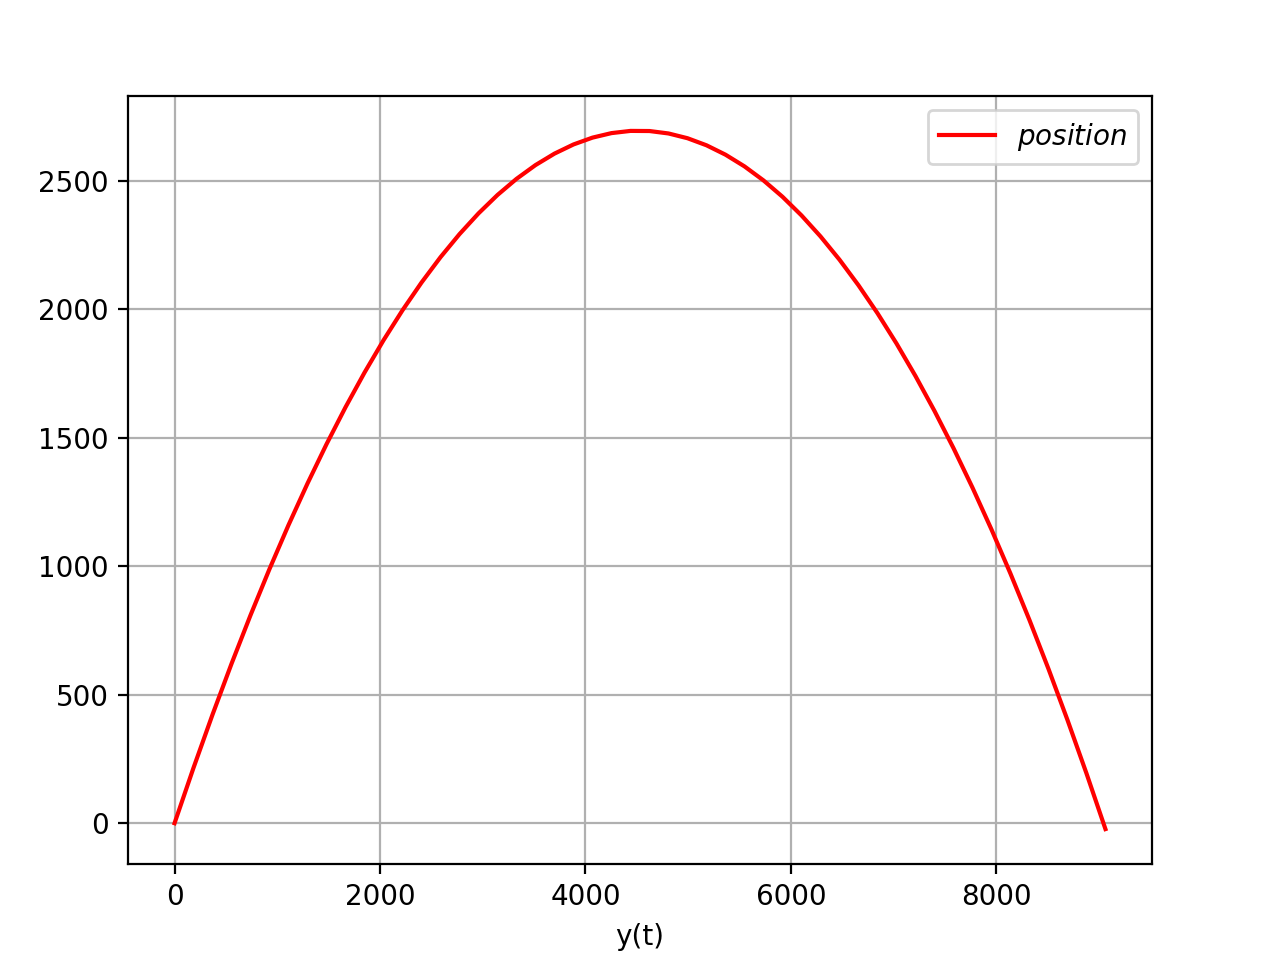

In [6]:
fig = plt.figure('Projectile Trajectory')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(sol_RK45.y[0],sol_RK45.y[1],'r', label=r'$position$')

ax.legend(loc='best')
ax.set_xlabel('x(t)')
ax.set_xlabel('y(t)')
ax.grid()

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [7]:
def rungekutta_4(f,t,x0, args=()):
    g = 9.8 #N/m
    n = len(t)
    x = np.zeros( ( n, len(x0) ) )
    x[0] = x0 #set inital condition 
    for i in range (0,n-1):      
        dt = t[i+1] - t[i]
        k1 = f(t[i], x[i], *args)
        k2 = f(t[i] + (dt/2), x[i] + ((dt/2)*k1), *args)
        k3 = f(t[i] + (dt/2), x[i] + ((dt/2)*k2), *args)
        k4 = f(t[i] + dt, x[i] + (dt*k3), *args)
        x[i+1] = x[i] + dt*k2                
    return x

In [8]:
sol_rk4 = rungekutta_4(proj_vac,t,x0)

<IPython.core.display.Javascript object>


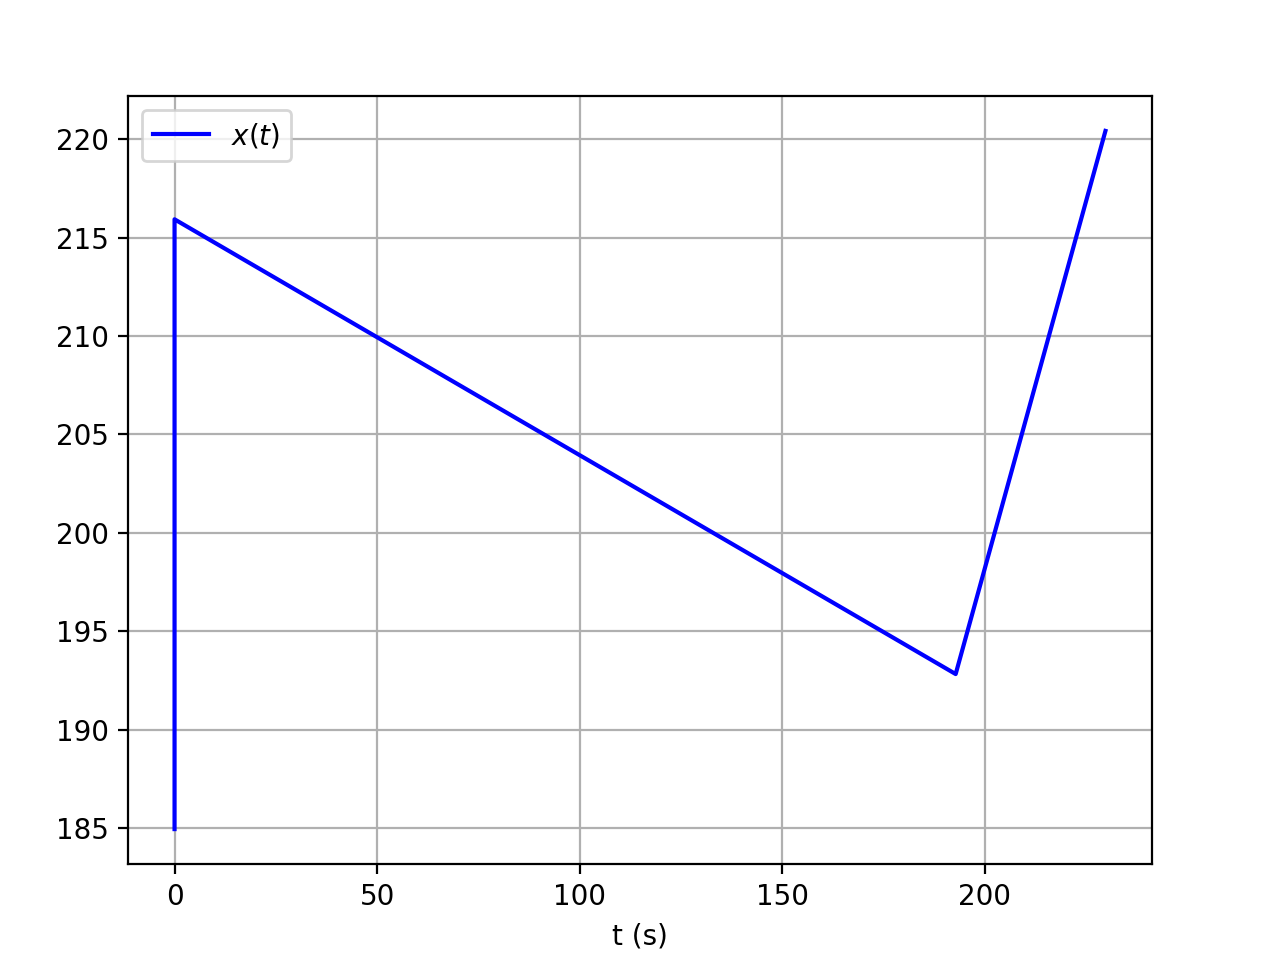

In [9]:
fig = plt.figure('Runge-Kutta 4')
ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.plot(sol_rk4[0],sol_rk4[1],'b', label=r'$x(t)$')

ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.grid()

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

It seems to be less accurate because it only take the slope in a few places.

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [10]:
def proj_res(t,x0):
    g = 9.8
    D = 0.15 #m
    up = 0.25 #𝑁⋅𝑠2/𝑚4
    c = up * (D**2)
    dx_dt = x0[2] * c
    dy_dt = x0[3] * c
    dvx_dt = 0
    dvy_dt = -g
    return np.array([dx_dt, dy_dt, dvx_dt, dvy_dt]) 

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [11]:
sol_RK45r = integrate.solve_ivp(proj_res,(t0,tf),x0,method='RK45', t_eval=t)

Plot the ball's trajecory and find it's horizontal range

In [12]:
sol_RK45r.y

array([[ 0.00000000e+00,  1.04043045e+00,  2.08086091e+00,
         3.12129136e+00,  4.16172182e+00,  5.20215227e+00,
         6.24258273e+00,  7.28301318e+00,  8.32344364e+00,
         9.36387409e+00,  1.04043045e+01,  1.14447350e+01,
         1.24851655e+01,  1.35255959e+01,  1.45660264e+01,
         1.56064568e+01,  1.66468873e+01,  1.76873177e+01,
         1.87277482e+01,  1.97681786e+01,  2.08086091e+01,
         2.18490396e+01,  2.28894700e+01,  2.39299005e+01,
         2.49703309e+01,  2.60107614e+01,  2.70511918e+01,
         2.80916223e+01,  2.91320527e+01,  3.01724832e+01,
         3.12129136e+01,  3.22533441e+01,  3.32937746e+01,
         3.43342050e+01,  3.53746355e+01,  3.64150659e+01,
         3.74554964e+01,  3.84959268e+01,  3.95363573e+01,
         4.05767877e+01,  4.16172182e+01,  4.26576487e+01,
         4.36980791e+01,  4.47385096e+01,  4.57789400e+01,
         4.68193705e+01,  4.78598009e+01,  4.89002314e+01,
         4.99406618e+01,  5.09810923e+01],
       [ 0.00

<IPython.core.display.Javascript object>


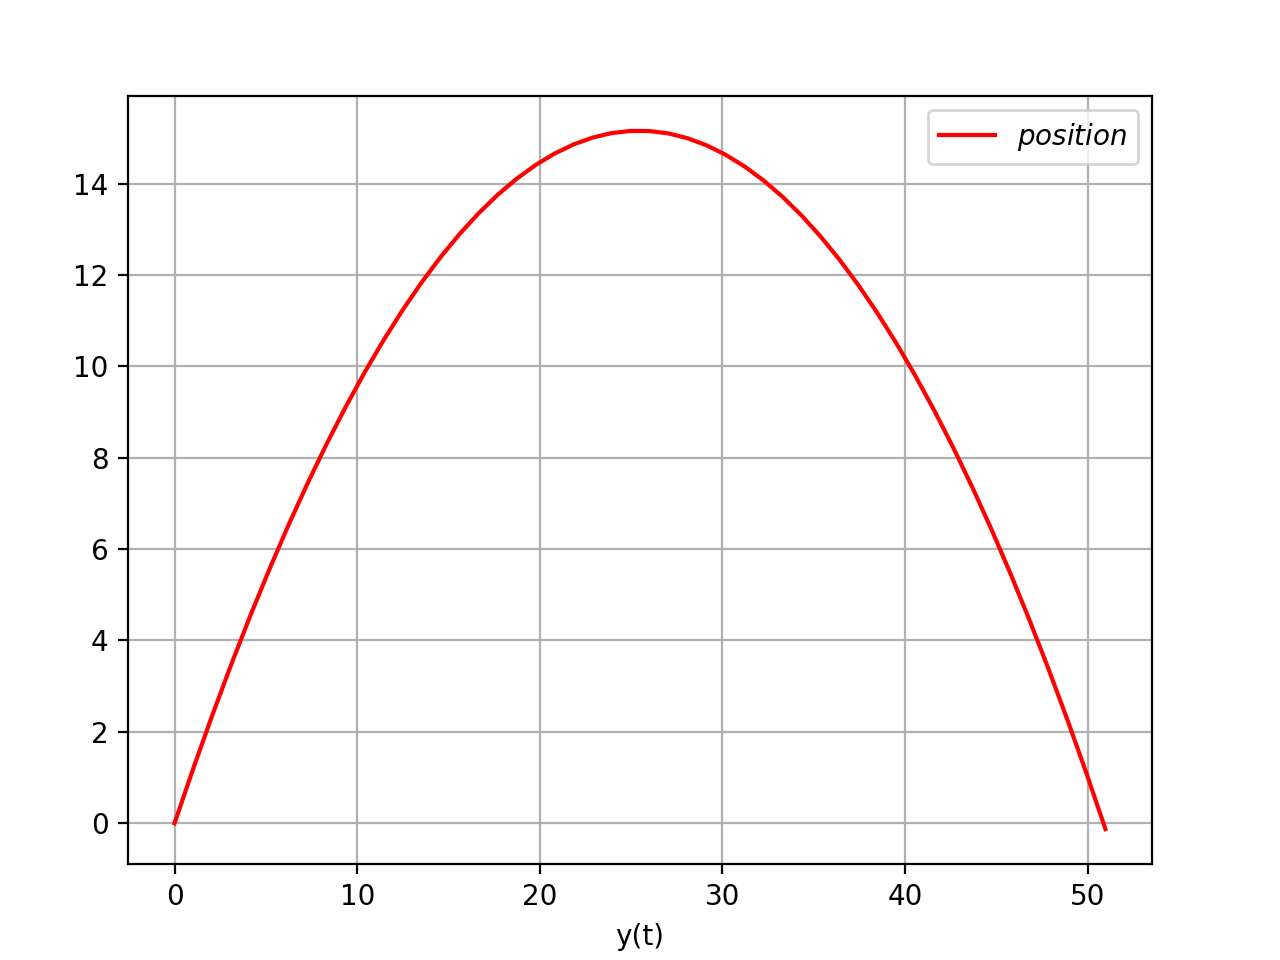

In [13]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib notebook 

fig = plt.figure('Projectile Trajectory')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(sol_RK45r.y[0],sol_RK45r.y[1],'r', label=r'$position$')

ax.legend(loc='best')
ax.set_xlabel('x(t)')
ax.set_xlabel('y(t)')
ax.grid()

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [18]:
def proj_resdrag(t,x0):
    g = 9.8
    D = 0.15 #m
    up = 0.25 #𝑁⋅𝑠2/𝑚4
    lam = 10000 #m
    y = x0[3] - (0.5*g*(t*2))
    c = up * (D**2) ** (-y/lam)
    dx_dt = x0[2] * c
    dy_dt = x0[3] * c
    dvx_dt = 0
    dvy_dt = -g
    return np.array([dx_dt, dy_dt, dvx_dt, dvy_dt]) 

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [19]:
sol_RK45rd = integrate.solve_ivp(proj_resdrag,(t0,tf),x0,method='RK45', t_eval=t)

Plot the ball's trajectory and find it's horizontal range

In [20]:
sol_RK45rd.y

array([[   0.        ,   50.27493909,  100.19253445,  149.75532854,
         198.96584357,  247.8265809 ,  296.34002499,  344.50864335,
         392.33488658,  439.82118839,  486.96996553,  533.78361787,
         580.26452832,  626.41506291,  672.23757073,  717.73438395,
         762.90781784,  807.76017074,  852.29372406,  896.51074231,
         940.41347308,  984.00415977, 1027.28502756, 1070.25827177,
        1112.92607339, 1155.29059909, 1197.35400128, 1239.11841802,
        1280.58597308, 1321.75877593, 1362.63892174, 1403.22849135,
        1443.52955132, 1483.5441539 , 1523.27433702, 1562.72212432,
        1601.88952513, 1640.77853447, 1679.39113307, 1717.72928734,
        1755.79494938, 1793.590057  , 1831.1165337 , 1868.37628867,
        1905.3712168 , 1942.10319868, 1978.57410057, 2014.78577445,
        2050.740058  , 2086.43877456],
       [   0.        ,   58.69144463,  114.532439  ,  167.56060998,
         217.81313302,  265.32671515,  310.1377055 ,  352.28209532,
         

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


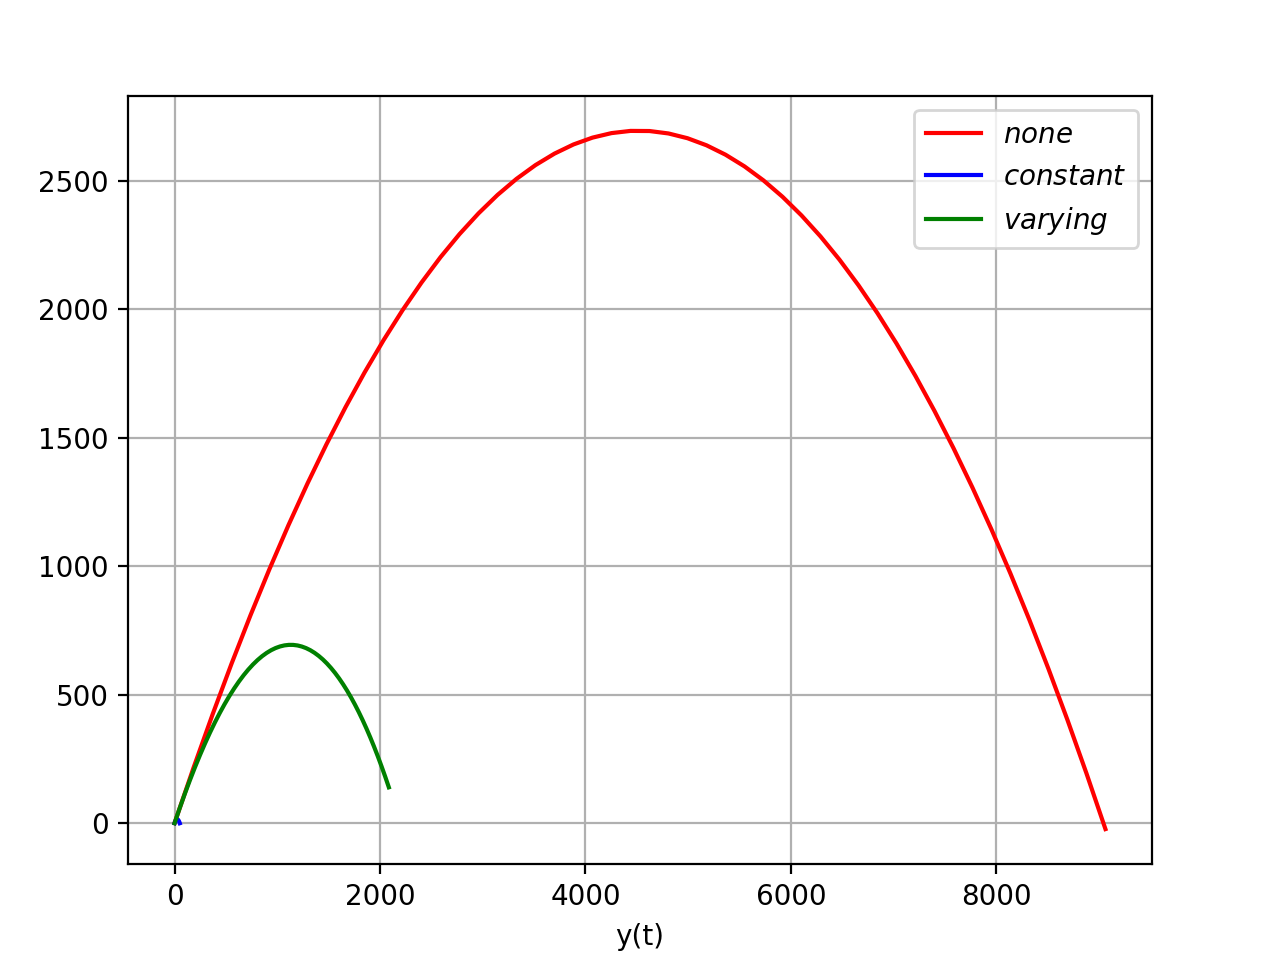

<function matplotlib.pyplot.show(block=None)>

In [22]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib notebook 

fig = plt.figure('Projectile Trajectory')
ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.plot(sol_RK45.y[0],sol_RK45.y[1],'r', label=r'$none$')
ax.plot(sol_RK45r.y[0],sol_RK45r.y[1],'b', label=r'$constant$')
ax.plot(sol_RK45rd.y[0],sol_RK45rd.y[1],'g', label=r'$varying$')

ax.legend(loc='best')
ax.set_xlabel('x(t)')
ax.set_xlabel('y(t)')
ax.grid()
plt.show

Your results should look like the plot below.

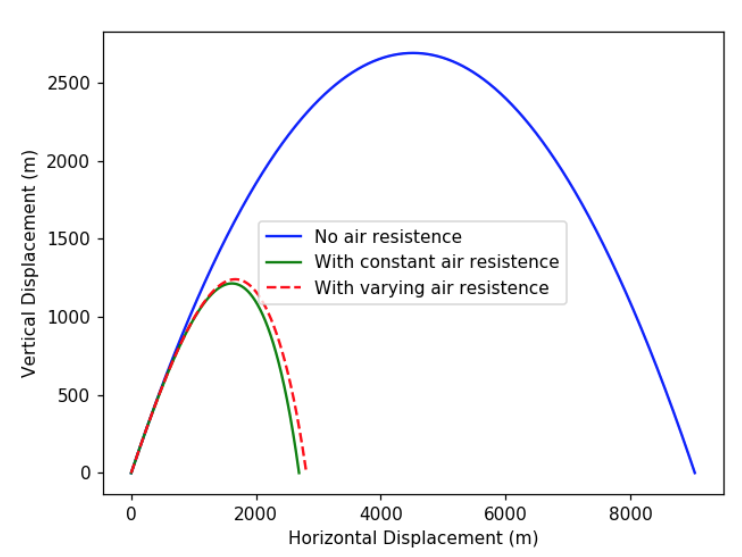

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

In [ ]:
The constant air resistance.